<a href="https://colab.research.google.com/github/leti-olabarri/premier-fantasy/blob/feature%2Fload_data/models/Sentiment_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import re
import pandas as pd
import numpy as np
import nltk
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [69]:
def starts_with_date_and_time(string):
    pattern = '^([0-9]+)(/)([0-9]+)(/)([0-9][0-9]) ([0-9]+):([0-9][0-9]) -'
    result = re.match(pattern, string)
    if result:
        return True
    return False

def get_data_point(line):   
    splitLine = line.split(' - ')
    dateTime = splitLine[0]
    date, time = dateTime.split(' ') 
    message = ' '.join(splitLine[1:])
    splitMessage = message.split(': ')
    author = splitMessage[0]
    message = ' '.join(splitMessage[1:])
    return date, time, author, message

parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
### Uploading exported chat file
conversationPath = '../content/all.txt' # chat file
with open(conversationPath, encoding="utf-8") as fp:
    ### Skipping first line of the file because contains information related to something about end-to-end encryption
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip()
        if starts_with_date_and_time(line):
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear()
            date, time, author, message = get_data_point(line) 
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
### changing datatype of "Date" column.
df["Date"] = pd.to_datetime(df["Date"])
df["Time"] = pd.to_datetime(df["Time"], format='%H%M', errors='ignore')

In [70]:
df.head()

,Date,Time,Author,Message
0,2019-12-20,21:17,Leticia Olábarri,Adri
1,2019-12-20,21:17,Leticia Olábarri,¿Vienes?
2,2019-12-20,22:02,Adri Ávalos,Sí 😬
3,2019-12-20,22:03,Adri Ávalos,Ya voy
4,2019-12-20,22:03,Adri Ávalos,Me he liado un pelin


In [71]:
df.drop(df[(df['Author'] == 'Los mensajes y las llamadas están cifrados de extremo a extremo. Nadie fuera de este chat, ni siquiera WhatsApp, puede leerlos ni escucharlos. Toca para obtener más información.')].index, inplace=True)
df.drop(df[(df['Author'] == '\u200eMarcela Duque cambió su número de teléfono. Toca para enviar un mensaje o añadir el nuevo número.')].index, inplace=True)
df.drop(df[(df['Author'] == '\u200eMarcela Duque cambió su número de teléfono. Actualmente te estás comunicando con su nuevo número. Toca para añadir a tus contactos.')].index, inplace=True)
df.drop(df[(df['Message'] == '<Multimedia omitido>')].index, inplace=True)

In [72]:
df.shape

(55006, 4)

In [73]:
df["Message total length"] = df["Message"].apply(lambda x: len(x))
df.drop(df[(df['Message total length'] < 10)].index, inplace=True)

In [53]:
df.shape

(43096, 5)

In [74]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Message"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Message"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Message"]]
print(df.head())

         Date   Time            Author  ... Positive  Negative  Neutral
4  2019-12-20  22:03       Adri Ávalos  ...      0.0       0.0      1.0
5  2019-12-20  22:09  Leticia Olábarri  ...      0.0       0.0      1.0
7  2019-12-20  22:14  Leticia Olábarri  ...      0.0       0.0      1.0
9  2019-12-20  22:15       Adri Ávalos  ...      0.0       0.0      1.0
10 2019-12-20  22:15  Leticia Olábarri  ...      0.0       0.0      1.0

[5 rows x 8 columns]


In [75]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

print(f"Positive 😊: {x}")
print(f"Negative 😠: {y}")
print(f"Neutral 🙂: {z}")

Positive 😊: 931.2599999999948
Negative 😠: 2148.2559999999817
Neutral 🙂: 40016.48999999983


In [56]:
df.iloc[4326,:]

Date                                   2020-01-04 00:00:00
Time                                                 21:19
Author                                    Leticia Olábarri
Message                 Esto no es _Ocho apellidos vascos_
Message total length                                    34
Positive                                                 0
Negative                                             0.306
Neutral                                              0.694
Name: 5942, dtype: object

In [57]:
pip install sentiment-analysis-spanish

In [60]:
from sentiment_analysis_spanish import sentiment_analysis

In [76]:
df.head()

,Date,Time,Author,Message,Message total length,Positive,Negative,Neutral
4,2019-12-20,22:03,Adri Ávalos,Me he liado un pelin,20,0.0,0.0,1.0
5,2019-12-20,22:09,Leticia Olábarri,Vaaaaaamooooooossssss,21,0.0,0.0,1.0
7,2019-12-20,22:14,Leticia Olábarri,Avisa cuando llegues,20,0.0,0.0,1.0
9,2019-12-20,22:15,Adri Ávalos,Por dónde estáis ?,18,0.0,0.0,1.0
10,2019-12-20,22:15,Leticia Olábarri,Bufff 20/12/19 22:1g5 - Leticia Olábarri: Enfr...,64,0.0,0.0,1.0


In [77]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
df["Sentiment"] = [sentiment.sentiment(i) for i in df["Message"]]
print(df.head())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


         Date   Time            Author  ... Negative  Neutral  Sentiment
4  2019-12-20  22:03       Adri Ávalos  ...      0.0      1.0   0.178709
5  2019-12-20  22:09  Leticia Olábarri  ...      0.0      1.0   0.497892
7  2019-12-20  22:14  Leticia Olábarri  ...      0.0      1.0   0.266227
9  2019-12-20  22:15       Adri Ávalos  ...      0.0      1.0   0.201907
10 2019-12-20  22:15  Leticia Olábarri  ...      0.0      1.0   0.778705

[5 rows x 9 columns]


In [78]:
positive = 0
negative = 0
neutral = 0

for i in df["Sentiment"]:
  if i < 0.4:
    negative = negative + 1
  if (i >= 0.33) and (i <= 0.66):
    neutral = neutral +1
  else:
    positive = positive + 1

print(f"Positive 😊: {positive}")
print(f"Negative 😠: {negative}")
print(f"Neutral 🙂: {neutral}")

Positive 😊: 32686
Negative 😠: 32715
Neutral 🙂: 10410


In [80]:
print(df.iloc[4326,:])
print(df.iloc[6858,:])
print(df.iloc[79,:])
print(df.iloc[867,:])

Date                                   2020-01-04 00:00:00
Time                                                 21:19
Author                                    Leticia Olábarri
Message                 Esto no es _Ocho apellidos vascos_
Message total length                                    34
Positive                                                 0
Negative                                             0.306
Neutral                                              0.694
Sentiment                                        0.0102142
Name: 5942, dtype: object
Date                    2020-04-21 00:00:00
Time                                  17:31
Author                     Leticia Olábarri
Message                   ¿Cómo va el tuyo?
Message total length                     17
Positive                                  0
Negative                                  0
Neutral                                   1
Sentiment                          0.119101
Name: 9481, dtype: object
Date                 

In [101]:
last_year = df[df["Date"] > "2020-10-22"]
last_year = last_year[last_year["Date"] < "2021-10-22"]
last_year_me = last_year[last_year["Author"] == "Leticia Olábarri"]
last_year_me.head()

,Date,Time,Author,Message,Message total length,Positive,Negative,Neutral,Sentiment
86,2020-11-07,10:48,Leticia Olábarri,Adriiiiiiiii,12,0.0,0.000,1.000,0.497892
87,2020-11-07,10:48,Leticia Olábarri,¿Has empezado a celebrar ya tu cumple?,38,0.0,0.000,1.000,0.015750
90,2020-11-07,10:52,Leticia Olábarri,Jajajajajajajaja,16,0.0,0.000,1.000,0.497892
91,2020-11-07,10:52,Leticia Olábarri,No sabía eso,12,0.0,0.524,0.476,0.012254
94,2020-11-07,10:53,Leticia Olábarri,"Pues bien. Con ganas de coger vacaciones, pero...",65,0.0,0.167,0.833,0.633624


In [97]:
last_year.shape

(23817, 9)

In [98]:
x_data = last_year_me["Date"]
y_data = last_year_me["Sentiment"]

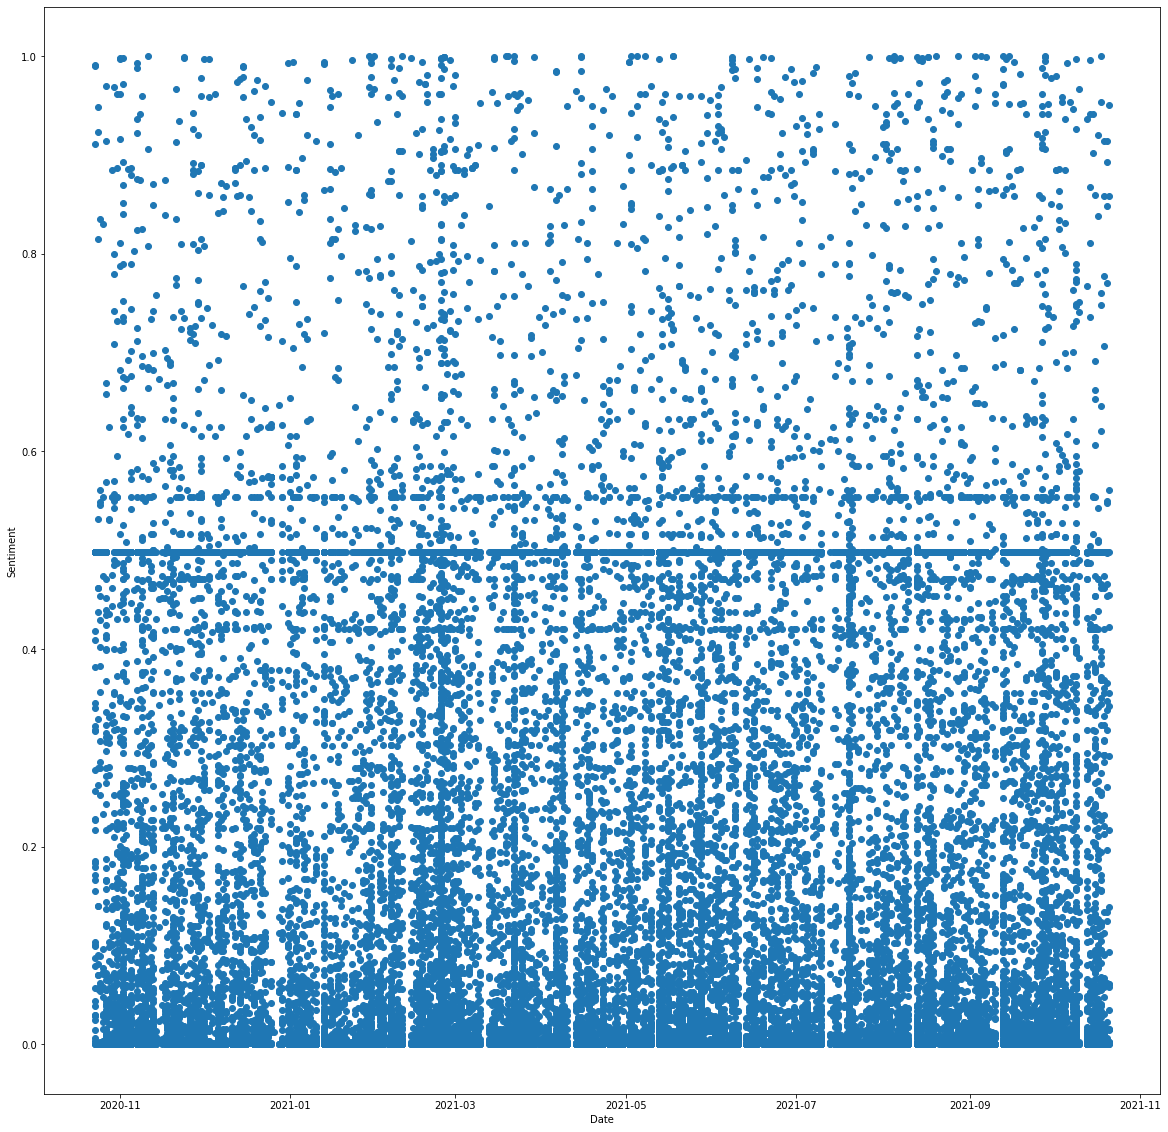

In [102]:
plt.figure(figsize=(20,20))
plt.scatter(x_data, y_data)
plt.ylabel('Sentiment')
plt.xlabel("Date")
plt.show()

In [104]:
last_year_others = last_year[last_year["Author"] != "Leticia Olábarri"]

In [118]:
time_data = last_year_others["Date"]
author_data = last_year_others["Author"]

<Figure size 1440x1440 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


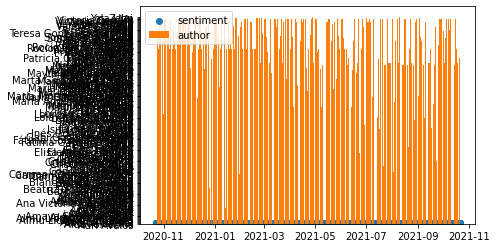

In [119]:
plt.figure(figsize=(20,20))

fig, ax = plt.subplots()
ax.scatter(x_data, y_data, label="sentiment")
ax.bar(time_data, author_data, label="author")
ax.legend()

plt.show()